In [18]:
# 对AOD做高程的纠正并输出各年份的统计信息
from osgeo import gdal
import cv2
import numpy as np
import os
import pandas as pd

stat = pd.DataFrame()
blue_arr_mean = []
red_arr_mean = []
blue_arr_max = []
red_arr_max = []
# 不统计最小值的原因是, 处理的时候将不存在的值都设置为0
folder_path = "./clipped/"
ele_data = gdal.Open("./luoyuan-elevation-km.tif")
el = ele_data.GetRasterBand(1).ReadAsArray()
for fname in os.listdir(folder_path):
    if fname[-4:] != ".tif":
        continue
    data = gdal.Open(folder_path + fname, gdal.GA_ReadOnly)
    red_aot = data.GetRasterBand(1).ReadAsArray()
    blue_aot = data.GetRasterBand(2).ReadAsArray()
    x, y = el.shape
    red_aot = cv2.resize(red_aot, dsize=(y, x), 
                         interpolation=cv2.INTER_LINEAR)
    blue_aot = cv2.resize(blue_aot, dsize=(y, x), 
                         interpolation=cv2.INTER_LINEAR)
    red_aot2 = red_aot.copy()
    red_aot2[red_aot != 0] = 0.00877 * 0.55**-4.05 * \
        (1-np.exp(-el[red_aot != 0]/8.5)) \
            + red_aot[red_aot != 0]
    blue_aot2 = blue_aot.copy()
    blue_aot2[blue_aot != 0] = 0.00877 * 0.55**-4.05 * \
        (1-np.exp(-el[blue_aot != 0]/8.5)) \
            + blue_aot[blue_aot != 0]
    out_ds = gdal.GetDriverByName("GTiff").\
        Create("./aot-corr/" + fname, 
                y, x, 2, gdal.GDT_Float32)
    band1 = out_ds.GetRasterBand(1)
    band1.WriteArray(red_aot2)
    band2 = out_ds.GetRasterBand(2)
    band2.WriteArray(blue_aot2)
    out_ds.SetGeoTransform(data.GetGeoTransform())
    out_ds.SetProjection(data.GetProjection())
    out_ds.FlushCache()
    out_ds = None
    # blue_arr_mean.append(np.nanmean(blue_aot2))
    # red_arr_mean.append(np.nanmean(red_aot2))
    # blue_arr_max.append(np.nanmax(blue_aot2))
    # red_arr_max.append(np.nanmax(red_aot2))

    print(fname + " aot550 has been corrected by elevation!")

MOD021KM.A2011181.0325.061.2017324101641_5cloud-clip22clipped.tif aot550 has been corrected by elevation!
MOD021KM.A2012182.0200.061.2017334143411_5cloud-clip22clipped.tif aot550 has been corrected by elevation!
MOD021KM.A2013181.0305.061.2017299063350_5cloud-clip22clipped.tif aot550 has been corrected by elevation!
MOD021KM.A2014181.0235.061.2017312140235_5cloud-clip22clipped.tif aot550 has been corrected by elevation!
MOD021KM.A2016182.0220.061.2017326170448_5cloud-clip22clipped.tif aot550 has been corrected by elevation!
MOD021KM.A2017181.0325.061.2017315065028_5cloud-clip22clipped.tif aot550 has been corrected by elevation!
MOD021KM.A2018181.0255.061.2018181133528_5cloud-clip22clipped.tif aot550 has been corrected by elevation!
MOD021KM.A2019181.0225.061.2019181131027_5cloud-clip22clipped.tif aot550 has been corrected by elevation!


In [13]:
np.nanmax(blue_aot), np.nanmean(blue_aot), np.nanmean(red_aot), np.nanmax(red_aot)

(0.5661972, 0.28482646, 0.28482646, 0.5661972)

In [21]:
# 保存统计数据
svg = np.array([np.array(red_arr_max),
                np.array(red_arr_mean), 
                np.array(blue_arr_max), 
                np.array(blue_arr_mean)])
np.save("stats-of-aod.npy", svg)

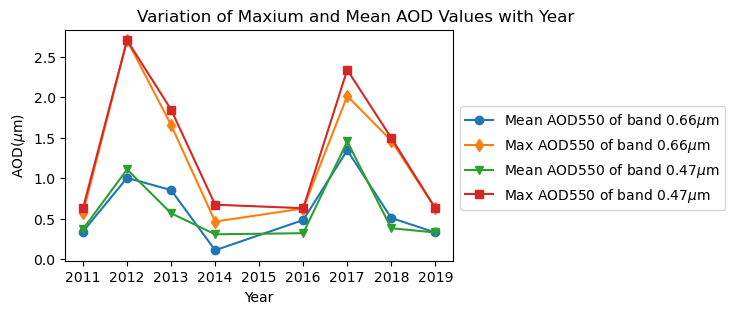

In [21]:
import matplotlib.pyplot as plt
import numpy as np
st = np.load("stat2.npy")
year = [2011,2012,2013,2014,2016,2017,2018,2019]
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(year, st[1], '-o', label="Mean AOD550 of band 0.66$\mu$m")
ax.plot(year, st[0], '-d', label="Max AOD550 of band 0.66$\mu$m")
ax.plot(year, st[3], '-v', label="Mean AOD550 of band 0.47$\mu$m")
ax.plot(year, st[2], '-s', label="Max AOD550 of band 0.47$\mu$m")
plt.xlabel("Year")
plt.ylabel("AOD($\mu$m)")
ax.legend(bbox_to_anchor=(1.,0.7))
plt.title("Variation of Maxium and Mean AOD Values with Year",
           x=0.75, y=1)
# bbox_inches='tight'防止坐标轴显示不全
plt.savefig("./visualization/stat.pdf", dpi=300, bbox_inches = 'tight')
plt.show()

In [7]:
a = np.array([1,np.nan, 2])
np.nanmean(a)
np.max(a)

nan

In [23]:
st

array([[0.5720427 , 2.702205  , 1.6571355 , 0.46662354, 0.62692034,
        2.0139356 , 1.4644104 , 0.6316235 ],
       [0.34347314, 1.0044318 , 0.85470253, 0.11298013, 0.4850499 ,
        1.345311  , 0.5108329 , 0.33165756],
       [0.6309889 , 2.702205  , 1.8472286 , 0.67417115, 0.6311006 ,
        2.3368564 , 1.4981769 , 0.6316235 ],
       [0.37455916, 1.1086358 , 0.56879723, 0.3092775 , 0.32288575,
        1.4545723 , 0.38467848, 0.33165756]], dtype=float32)